In [1]:
#### check which version of python is used in Jupyter
import sys
print(sys.executable)
print(sys.version)

/Users/riyanandi/Desktop/ML/Apziva2/project2/bin/python3.11
3.11.9 (main, Apr  2 2024, 08:25:04) [Clang 15.0.0 (clang-1500.1.0.2.5)]


In [2]:
# check version
from pycaret.utils import version
version()

'3.3.2'

### 1. Preprocessing ###

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

#headers=['Happiness','On_time','content_as_expected','ordered_what_I_wanted','good_price','delivery_satisfaction','app_ease']
data=pd.read_csv('term-deposit-marketing-2020.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [60]:
print(data.columns.tolist())
data.info()

['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [61]:
data.duplicated().sum()
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

#### no duplicates, no null values ###

### 2. Categorical to Numerical Transformations ###

In [62]:
print(data['marital'].unique(),data['education'].unique(),data['default'].unique(),data['housing'].unique(),
      data['loan'].unique(),data['contact'].unique(),data['job'].unique())

['married' 'single' 'divorced'] ['tertiary' 'secondary' 'unknown' 'primary'] ['no' 'yes'] ['yes' 'no'] ['no' 'yes'] ['unknown' 'cellular' 'telephone'] ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']


In [63]:
#separate different columns
binary_cols=['default','housing','loan','y']
onehot_cols=['contact','job','marital','month']
ordinal_cols=['education']

In [64]:
# different categories have to be transformed differently
#binary transform

# Define map values
mapping = {'yes': 1,
           'no': 0}

# Define function to binarise features
def binarise_values(data, cols, map):
    for col in cols:
        data[col] = data[col].map(map)
    return data
    
# Call function
binarised_df = binarise_values(data, binary_cols, mapping)
binarised_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,0


In [65]:
#onehot and ordinal transform
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

education_rank = [['unknown', 'primary', 'secondary','tertiary']]

# Define ordinal encoder
ord_encoder = OrdinalEncoder(categories=education_rank)

#Define onehot encoder
ohe_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [66]:
numerical_cols_df=binarised_df.select_dtypes(include=['number'])
numerical_cols = numerical_cols_df.columns.tolist()

# Encode ordinals and create dfs
ord_encoded = ord_encoder.fit_transform(binarised_df[ordinal_cols])
ord_encoded_df = pd.DataFrame(ord_encoded)
ord_encoded_df.columns = ordinal_cols

# One-hot encoding
one_hot_encoded = ohe_encoder.fit_transform(binarised_df[onehot_cols])
one_hot_encoded_df = pd.DataFrame(one_hot_encoded)
one_hot_encoded_df.columns = ohe_encoder.get_feature_names_out()

# Reset the index for all DataFrames to ensure alignment
numerical_cols_df = numerical_cols_df.reset_index(drop=True)
ord_encoded_df = ord_encoded_df.reset_index(drop=True)
one_hot_encoded_df = one_hot_encoded_df.reset_index(drop=True)

# Join encoded dfs to a single df and show head
df_encoded = pd.concat([numerical_cols_df,ord_encoded_df,one_hot_encoded_df], axis=1)
df_encoded.head()

,age,default,balance,housing,loan,day,duration,campaign,y,education,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
0,58,0,2143,1,0,5,261,1,0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,44,0,29,1,0,5,151,1,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,33,0,2,1,1,5,76,1,0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,0,1506,1,0,5,92,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,33,0,1,0,0,5,198,1,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### 3. Train test split ###

In [67]:
#### Split the data into training and testing sets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Assign attribute and output variable
X=df_encoded.drop(['y'],axis=1)
y=df_encoded['y']

seed=478

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)

training_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)
print("training data size:",X_train.shape,y_train.shape)
print("test data size:",X_test.shape,y_test.shape)

training data size: (30000, 38) (30000,)
test data size: (10000, 38) (10000,)


### 4. Data Imbalance ###

y
0    27815
1     2185
Name: count, dtype: int64


<Axes: ylabel='count'>

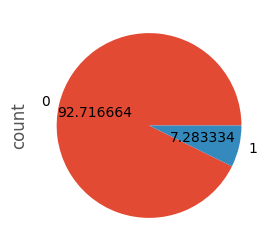

In [68]:
plt.figure(figsize=(4,3))
print(y_train.value_counts())
y_train.value_counts().plot.pie(autopct='%2f')

**random undersampling**
*'not minority'= resample all classes except the minority class*

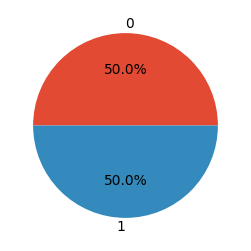

y
0    2185
1    2185
Name: count, dtype: int64


In [69]:
### random undersampling ###
plt.figure(figsize=(4,3))

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(sampling_strategy=1)  # float

# Perform the resampling
X_train_rus, y_train_rus = rus.fit_resample(X_train,y_train)

# Plot the value counts of the resampled target variable as a pie chart
y_train_rus.value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')  # To remove the y-label
plt.show()
print(y_train_rus.value_counts())

# New undersampled dataset
training_df_US = pd.DataFrame(X_train_rus, columns=X_train.columns)
training_df_US['y'] = y_train_rus

**random oversampling**
*'not majority'= resample all classes except the majority class*

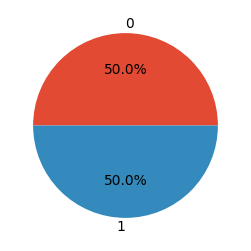

y
0    27815
1    27815
Name: count, dtype: int64


In [70]:
### random oversampling ###
plt.figure(figsize=(4,3))

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy=1)  # float

# Perform the resampling
X_train_ros, y_train_ros = ros.fit_resample(X_train,y_train)

# Plot the value counts of the resampled target variable as a pie chart
y_train_ros.value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')  # To remove the y-label
plt.show()
print(y_train_ros.value_counts())

# New undersampled dataset
training_df_OS = pd.DataFrame(X_train_ros, columns=X_train.columns)
training_df_OS['y'] = y_train_ros

Resampled dataset saved successfully.


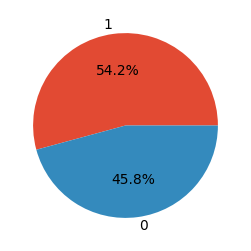

y
1    24386
0    20586
Name: count, dtype: int64


In [71]:
from imblearn.combine import SMOTEENN
from sklearn.datasets import make_classification

plt.figure(figsize=(4,3))

# Apply SMOTEENN
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=seed)
X_train_SmoteENN, y_train_SmoteENN = smote_enn.fit_resample(X_train,y_train)

# Combine the resampled features and target into a single DataFrame
feature_names=X_train.columns.to_list()
training_df_SmoteENN = pd.DataFrame(X_train_SmoteENN, columns=feature_names)
training_df_SmoteENN['y'] = y_train_SmoteENN


print("Resampled dataset saved successfully.")
# Plot the value counts of the resampled target variable as a pie chart
training_df_SmoteENN['y'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')  # To remove the y-label
plt.show()
print(training_df_SmoteENN['y'].value_counts())

Resampled dataset saved successfully.


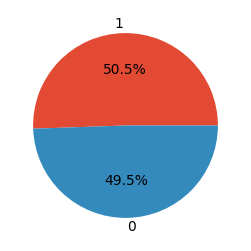

y
1    27815
0    27211
Name: count, dtype: int64


In [72]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

plt.figure(figsize=(4,3))

# Apply SMOTEENN
smote_tomek=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X_train_smtomek, y_train_smtomek = smote_tomek.fit_resample(X_train,y_train)

# Combine the resampled features and target into a single DataFrame
feature_names=X_train.columns.to_list()
training_df_smtomek = pd.DataFrame(X_train_smtomek, columns=feature_names)
training_df_smtomek['y'] = y_train_smtomek


print("Resampled dataset saved successfully.")
# Plot the value counts of the resampled target variable as a pie chart
training_df_smtomek['y'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')  # To remove the y-label
plt.show()
print(training_df_smtomek['y'].value_counts())

### 5. Correlations ###

In [141]:
# choose which resampled dataset to use 
training_df_resampled=training_df_SmoteENN.copy()

<Axes: >

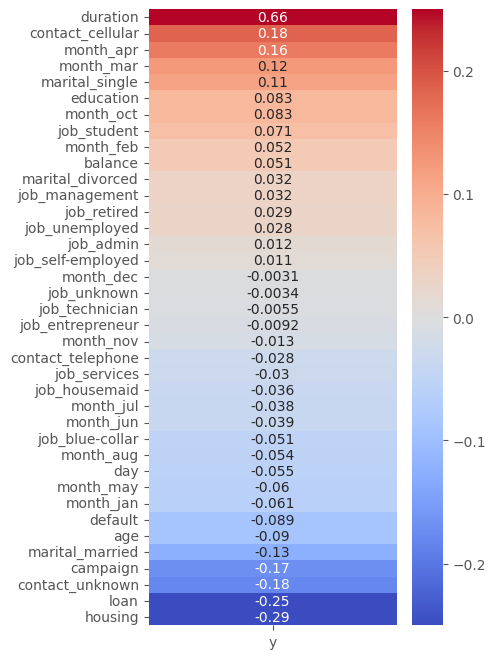

In [129]:
fig, ax = plt.subplots(figsize=(4, 8))

corr_matrix = training_df_resampled.corr(numeric_only=True).sort_values(by='y',ascending=False)
corr_matrix_no_claim = corr_matrix.drop('y')

sns.heatmap(corr_matrix_no_claim[['y']],cmap='coolwarm', annot=True, vmax=0.25, vmin=-0.25)

**In this exercise, we are going to optimize the number of calls made by ignoring all the call-related columns**

### 6. Model Building ###

#### 6.1 Drop call related columns ####

In [142]:
#### drop call related columns ######
cols_to_drop= [col for col in training_df.columns if (col.startswith('month_') 
                                                     or col.startswith('contact_')
                                                     or col.startswith('day')
                                                     or col.startswith('duration'))]
# Now drop those columns
training_df_mod = training_df_resampled.drop(columns=cols_to_drop)
test_df_mod =test_df.drop(columns=cols_to_drop)


X_train_mod = training_df_mod.drop(['y'],axis=1)
y_train_mod = training_df_mod['y']
X_test_mod = test_df_mod.drop(['y'],axis=1)
y_test_mod = test_df_mod['y']

training_df_mod.head()

,age,default,balance,housing,loan,campaign,education,job_admin,job_blue-collar,job_entrepreneur,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,y
0,28,0,8263,1,0,1,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,53,0,186,0,0,2,2.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,39,0,8,0,1,1,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,44,0,-600,1,1,3,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
4,60,0,12,0,0,1,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0


#### 6.2 Compare classification models ####

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    ExtraTreesClassifier  # Import ExtraTreesClassifier
)
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Define the classifiers to test
clfs = [
    ('Log_reg', LogisticRegression(solver='liblinear', max_iter=2000)),
    ('KNN', KNeighborsClassifier()),
    ('Decs_tr', DecisionTreeClassifier()),
    ('Rand_for', RandomForestClassifier(random_state=seed)),
    ('LinSVM', LinearSVC(random_state=seed, max_iter=1000, dual='auto')),
    ('XGBoost', XGBClassifier(random_state=seed)),
    ('AdaBoost', AdaBoostClassifier(random_state=seed, algorithm='SAMME')),
    ('Grad_Boost', GradientBoostingClassifier(random_state=seed)),
    ('Bagging', BaggingClassifier(random_state=seed)),
    ('ExtraTrees', ExtraTreesClassifier(random_state=seed)),
    ('lgbm', LGBMClassifier(random_state=seed))  
]

Text(0.5, 1.0, 'Cross-Validation Scores for Different Classifiers')

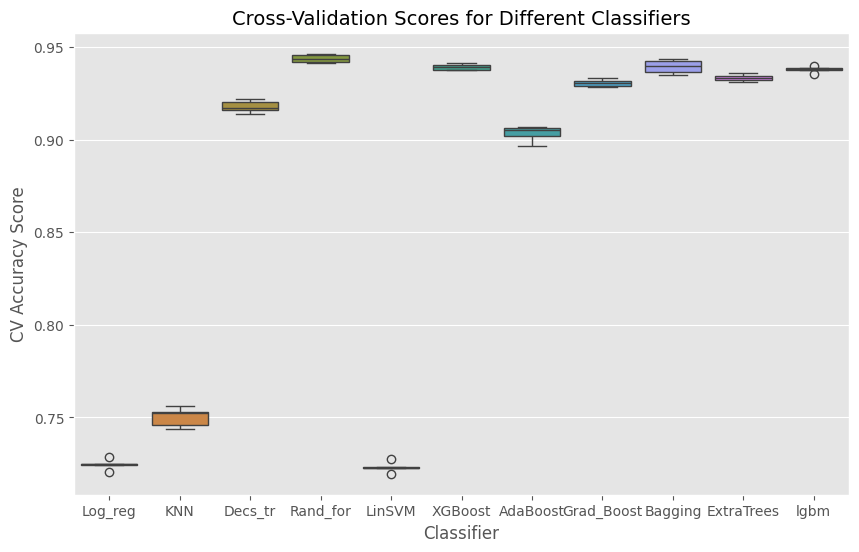

In [133]:
from sklearn.model_selection import StratifiedKFold as KFold, cross_val_score
from sklearn.metrics import make_scorer, f1_score

# Create KFold object with 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# Define a custom scorer for F1 score of class 1
f1_class1_scorer = make_scorer(f1_score, pos_label=1)

# Dictionary to store results
results = {}

# Evaluate each classifier using cross-validation
for clf_name, clf in clfs:
    cv_scores = cross_val_score(clf, X_train_mod, y_train_mod, cv=kf, scoring=f1_class1_scorer)
    results[clf_name] = cv_scores

cv_scores_df = pd.DataFrame(results)

# Plot scores
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(cv_scores_df)

# Add axis labels
ax.set_xlabel('Classifier', fontsize=12)
ax.set_ylabel('CV Accuracy Score', fontsize=12)
ax.set_title('Cross-Validation Scores for Different Classifiers', fontsize=14)

**Random forest, XGBoost, Bagging and LightGradientBoostingMachine all are similarly performing on training data**

#### 6.3 LightGBM ####

*Since we want to optimize calls made, we want precise prediction of calls that resulted in a successful customer onboarding*

##### 6.3.1 Hyperparameter Optimization using Optuna- Class 1 precision/recall optimization #####

In [122]:
#Optuna
import optuna
import lightgbm as lgbm
from sklearn.metrics import precision_score,f1_score


def objective(trial):
    # Define the hyperparameters to tune
    param = {
        'verbose': -1,
        'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
        'n_estimators': trial.suggest_int('n_estimators', 1, 300),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 0, 20),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 100.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 100.0),
        'random_state':seed
    }
    
    # Create a LightGBM dataset
    dtrain = lgbm.Dataset(X_train_mod, label=y_train_mod)

    # Train the model
    model = lgbm.train(param, dtrain)

    # Make predictions on the validation set
    y_pred_proba = model.predict(X_test_mod)
    y_pred = (y_pred_proba > 0.5).astype(int)

    # Calculate F1 score for class 1
    f1_class_1 = f1_score(y_test_mod, y_pred, pos_label=1)
    
    # Return the F1 score as the objective value to be maximized
    return f1_class_1

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')  # maximize f1 
study.optimize(objective, n_trials=200)

[I 2024-08-28 23:20:25,058] A new study created in memory with name: no-name-2e0dd3dd-5755-4a29-92fa-f8108f172b50
[I 2024-08-28 23:20:25,474] Trial 0 finished with value: 0.14995589532490444 and parameters: {'n_estimators': 259, 'learning_rate': 0.7951044984883251, 'max_depth': 30, 'subsample': 0.38919673012116207, 'colsample_bytree': 0.3984993175638045, 'min_child_weight': 13, 'reg_alpha': 87.66571040370516, 'reg_lambda': 33.928278654726476}. Best is trial 0 with value: 0.14995589532490444.
[I 2024-08-28 23:20:25,961] Trial 1 finished with value: 0.16398865784499056 and parameters: {'n_estimators': 166, 'learning_rate': 0.05450257723361379, 'max_depth': 13, 'subsample': 0.8957954787880895, 'colsample_bytree': 0.9122252734582881, 'min_child_weight': 6, 'reg_alpha': 71.7180117370724, 'reg_lambda': 3.884644674241966}. Best is trial 1 with value: 0.16398865784499056.
[I 2024-08-28 23:20:26,400] Trial 2 finished with value: 0.1587918015102481 and parameters: {'n_estimators': 272, 'learning

**[I 2024-08-28 17:19:03,201] Trial 7 finished with value: 0.15665236051502146 and parameters: {'n_estimators': 11, 'learning_rate': 0.1554412288674984, 'max_depth': 1, 'subsample': 0.40070686060254024, 'colsample_bytree': 0.5706248328527317, 'min_child_weight': 6, 'reg_alpha': 28.161939111010824, 'reg_lambda': 62.87208777715434}. Best is trial 7 with value: 0.15665236051502146.**

#### 6.2.2 Feature importance using Permutation Feature Importance ####

In [132]:
## Create a baseline score
model = lgbm.LGBMClassifier(
    boosting_type='gbdt',   # Gradient Boosting Decision Tree
    n_estimators=11,       # Number of boosting rounds
    learning_rate=.155,      # Step size shrinkage
    max_depth=1,           # Maximum depth of the tree
    subsample=0.4,          # Fraction of samples used for training each tree
    colsample_bytree=0.57,   # Fraction of features used for each tree
    min_child_weight=6,     # Minimum sum of instance weight (hessian) needed in a child
    reg_alpha=28.16,          # L1 regularization term on weights
    reg_lambda=62.87,         # L2 regularization term on weights
    random_state=seed,        # Random seed for reproducibility
    verbose=-1              # Suppress warnings
)

model.fit(X_train_mod, y_train_mod)

# Calculate F1 score with macro averaging on the test set
#f1_macro = f1_score(y_test_mod, model.predict(X_test_mod), average='macro')
# Calculate precision for class 1
f1_class_1 = f1_score(y_test_mod, model.predict(X_test_mod), pos_label=1)
print(f"f1_score 1: {f1_class_1:.4f}")

f1_score 1: 0.1548


In [134]:
from sklearn.inspection import permutation_importance

# Define a scorer using make_scorer for class 1 precision
f1_class_1_scorer = make_scorer(f1_score, pos_label=1)

# Compute permutation feature importance
perm_importance = permutation_importance(model, X_test_mod, y_test_mod, n_repeats=30, random_state=seed, scoring=f1_class_1_scorer)

# Display the results
feature_names = X_train_mod.columns
sorted_idx = perm_importance.importances_mean.argsort()

print("Permutation Feature Importance:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {perm_importance.importances_mean[i]:.4f} ± {perm_importance.importances_std[i]:.4f}")

Permutation Feature Importance:
job_management: -0.0035 ± 0.0022
age: 0.0000 ± 0.0000
marital_divorced: 0.0000 ± 0.0000
job_unknown: 0.0000 ± 0.0000
job_unemployed: 0.0000 ± 0.0000
job_student: 0.0000 ± 0.0000
job_services: 0.0000 ± 0.0000
job_self-employed: 0.0000 ± 0.0000
job_retired: 0.0000 ± 0.0000
job_housemaid: 0.0000 ± 0.0000
job_admin: 0.0000 ± 0.0000
education: 0.0000 ± 0.0000
campaign: 0.0000 ± 0.0000
balance: 0.0000 ± 0.0000
default: 0.0000 ± 0.0000
job_entrepreneur: 0.0000 ± 0.0000
marital_single: 0.0000 ± 0.0027
job_technician: 0.0010 ± 0.0021
job_blue-collar: 0.0018 ± 0.0023
loan: 0.0026 ± 0.0019
marital_married: 0.0075 ± 0.0043
housing: 0.0103 ± 0.0031


In [135]:
## Drop columns that doesn;t affect model behavior
new_cols_to_drop=[feature_names[i] for i in range(len(feature_names)) if abs(perm_importance.importances_mean[i]) < 0.001]
# Now drop those columns
training_df_mod2 = training_df_mod.drop(columns=new_cols_to_drop)
test_df_mod2 =test_df_mod.drop(columns=new_cols_to_drop)


X_train_mod2 = training_df_mod2.drop(['y'],axis=1)
y_train_mod2 = training_df_mod2['y']
X_test_mod2 = test_df_mod2.drop(['y'],axis=1)
y_test_mod2 = test_df_mod2['y']

training_df_mod2.head()

,housing,loan,job_blue-collar,job_management,job_technician,marital_married,y
0,1,0,1.0,0.0,0.0,0.0,0
1,0,0,0.0,0.0,0.0,0.0,0
2,0,1,1.0,0.0,0.0,1.0,0
3,1,1,0.0,0.0,0.0,0.0,0
4,0,0,0.0,0.0,1.0,0.0,0


In [136]:
model.fit(X_train_mod2, y_train_mod2)
y_pred=model.predict(X_test_mod2)
# Calculate F1 score for class 1
f1_class_1 = f1_score(y_test_mod2, y_pred, pos_label=1)
print(f"f1_score 1: {f1_class_1:.4f}")

# Calculate the accuracy
accuracy = accuracy_score(y_test_mod2, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_mod2, y_pred))

f1_score 1: 0.1524
Accuracy: 0.5516
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.55      0.70      9289
           1       0.09      0.57      0.15       711

    accuracy                           0.55     10000
   macro avg       0.52      0.56      0.42     10000
weighted avg       0.88      0.55      0.66     10000



#### 6.4 RandomForest ####

##### 6.4.1 Hyperparameter optimization Optuna #####

In [95]:
from sklearn.ensemble import RandomForestClassifier

# Define the objective function for Optuna
def objective(trial):
    # Suggest hyperparameters for RandomForestClassifier
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 300),
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2']),
        'bootstrap': trial.suggest_categorical('bootstrap', [True, False]),
        'random_state': seed
    }
    
    # Initialize the RandomForestClassifier with the suggested hyperparameters
    model = RandomForestClassifier(**param)

    # Train the model on the training set
    model.fit(X_train_mod, y_train_mod)

    # Make predictions on the validation set
    y_pred = model.predict(X_test_mod)

    # Calculate F1 score for class 1
    f1_class_1 = f1_score(y_test_mod, y_pred, pos_label=1)

    # Return the F1 score as the objective value to be maximized
    return f1_class_1

# Create an Optuna study and optimize it
study = optuna.create_study(direction='maximize')  # maximize f1 score
study.optimize(objective, n_trials=200)

# Output the best hyperparameters and best score
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best F1 Score: {study.best_value}")

[I 2024-08-28 17:26:59,606] A new study created in memory with name: no-name-dceca85c-b84a-4fa1-a152-c76263ad865d
[I 2024-08-28 17:27:03,428] Trial 0 finished with value: 0.02972972972972973 and parameters: {'n_estimators': 121, 'max_depth': 27, 'min_samples_split': 5, 'min_samples_leaf': 9, 'max_features': 'sqrt', 'bootstrap': True}. Best is trial 0 with value: 0.02972972972972973.
[I 2024-08-28 17:27:07,039] Trial 1 finished with value: 0.13998782714546562 and parameters: {'n_estimators': 201, 'max_depth': 4, 'min_samples_split': 11, 'min_samples_leaf': 12, 'max_features': 'sqrt', 'bootstrap': False}. Best is trial 1 with value: 0.13998782714546562.
[I 2024-08-28 17:27:08,133] Trial 2 finished with value: 0.1260229132569558 and parameters: {'n_estimators': 64, 'max_depth': 5, 'min_samples_split': 11, 'min_samples_leaf': 1, 'max_features': 'log2', 'bootstrap': True}. Best is trial 1 with value: 0.13998782714546562.
[I 2024-08-28 17:27:10,356] Trial 3 finished with value: 0.14836223506

Best Hyperparameters: {'n_estimators': 144, 'max_depth': 1, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'log2', 'bootstrap': False}
Best F1 Score: 0.169826435246996


##### 6.4.2 Hyperparameter optimization Grid Search #####

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer, accuracy_score, classification_report

# Initialize the RandomForestClassifier model
rf = RandomForestClassifier(random_state=seed)

# Define the grid search space with fixed values
search_space = {
    'n_estimators': [i for i in range(140,150)],
    'max_depth': [None, 1, 2, 3],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [3, 4, 5, 6],
    'max_features': ['log2'],
    'bootstrap': [False],
}

# Define a scorer using make_scorer for class 1 F1 score
f1_class_1_scorer = make_scorer(f1_score, pos_label=1)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=search_space, cv=10, scoring=f1_class_1_scorer, n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_mod, y_train_mod)

print("GRID SEARCH")
print('GridSearchCV Best hyperparameters:', grid_search.best_params_)
print('GridSearchCV Best score:', grid_search.best_score_)

# Evaluate the best model from GridSearchCV on the test set
best_model = grid_search.best_estimator_
grid_accuracy = accuracy_score(y_true=y_test_mod, y_pred=best_model.predict(X_test_mod))
print('GridSearchCV Test set accuracy:', grid_accuracy)
print('GridSearchCV Classification Report:')
print(classification_report(y_true=y_test_mod, y_pred=best_model.predict(X_test_mod)))

GRID SEARCH
GridSearchCV Best hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 147}
GridSearchCV Best score: 0.9275220813454077
GridSearchCV Test set accuracy: 0.9235
GridSearchCV Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      9289
           1       0.24      0.03      0.06       711

    accuracy                           0.92     10000
   macro avg       0.58      0.51      0.51     10000
weighted avg       0.88      0.92      0.90     10000



#### 6.4.3 Feature importance using Permutation Feature Importance ####

In [143]:
## Create a baseline score
model = RandomForestClassifier(
    n_estimators=147,       # Number of boosting rounds
    max_depth=1,           # Maximum depth of the tree
    max_features= 'log2',
    min_samples_leaf= 3, 
    min_samples_split= 2,
    random_state=seed,
)

model.fit(X_train_mod, y_train_mod)

# Calculate F1 score with macro averaging on the test set
#f1_macro = f1_score(y_test_mod, model.predict(X_test_mod), average='macro')
# Calculate precision for class 1
f1_class_1 = f1_score(y_test_mod, model.predict(X_test_mod), pos_label=1)
print(f"f1_score 1: {f1_class_1:.4f}")

f1_score 1: 0.1610


In [144]:
from sklearn.inspection import permutation_importance

# Define a scorer using make_scorer for class 1 precision
f1_class_1_scorer = make_scorer(f1_score, pos_label=1)

# Compute permutation feature importance
perm_importance = permutation_importance(model, X_test_mod, y_test_mod, n_repeats=30, random_state=seed, scoring=f1_class_1_scorer)

# Display the results
feature_names = X_train_mod.columns
sorted_idx = perm_importance.importances_mean.argsort()

print("Permutation Feature Importance:")
for i in sorted_idx:
    print(f"{feature_names[i]}: {perm_importance.importances_mean[i]:.4f} ± {perm_importance.importances_std[i]:.4f}")

Permutation Feature Importance:
job_management: -0.0001 ± 0.0006
marital_divorced: -0.0001 ± 0.0001
job_self-employed: -0.0000 ± 0.0001
job_student: -0.0000 ± 0.0002
age: 0.0000 ± 0.0000
job_unknown: 0.0000 ± 0.0000
job_unemployed: 0.0000 ± 0.0000
job_retired: 0.0000 ± 0.0000
job_entrepreneur: 0.0000 ± 0.0000
job_housemaid: 0.0000 ± 0.0000
campaign: 0.0000 ± 0.0000
default: 0.0000 ± 0.0000
job_admin: 0.0001 ± 0.0004
balance: 0.0002 ± 0.0002
job_blue-collar: 0.0021 ± 0.0019
job_technician: 0.0022 ± 0.0012
job_services: 0.0023 ± 0.0011
education: 0.0025 ± 0.0013
loan: 0.0030 ± 0.0018
marital_married: 0.0050 ± 0.0023
marital_single: 0.0078 ± 0.0025
housing: 0.0124 ± 0.0019


In [145]:
## Drop columns that doesn;t affect model behavior
new_cols_to_drop=[feature_names[i] for i in range(len(feature_names)) if abs(perm_importance.importances_mean[i]) < 0.001]
# Now drop those columns
training_df_mod2 = training_df_mod.drop(columns=new_cols_to_drop)
test_df_mod2 =test_df_mod.drop(columns=new_cols_to_drop)


X_train_mod2 = training_df_mod2.drop(['y'],axis=1)
y_train_mod2 = training_df_mod2['y']
X_test_mod2 = test_df_mod2.drop(['y'],axis=1)
y_test_mod2 = test_df_mod2['y']

training_df_mod2.head()

,housing,loan,education,job_blue-collar,job_services,job_technician,marital_married,marital_single,y
0,1,0,1.0,1.0,0.0,0.0,0.0,1.0,0
1,0,0,2.0,0.0,0.0,0.0,0.0,1.0,0
2,0,1,2.0,1.0,0.0,0.0,1.0,0.0,0
3,1,1,2.0,0.0,0.0,0.0,0.0,0.0,0
4,0,0,2.0,0.0,0.0,1.0,0.0,1.0,0


In [146]:
model.fit(X_train_mod2, y_train_mod2)
y_pred=model.predict(X_test_mod2)
# Calculate F1 score for class 1
f1_class_1 = f1_score(y_test_mod2, y_pred, pos_label=1)
print(f"f1_score 1: {f1_class_1:.4f}")

# Calculate the accuracy
accuracy = accuracy_score(y_test_mod2, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_mod2, y_pred))

f1_score 1: 0.1487
Accuracy: 0.6289
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      9289
           1       0.09      0.46      0.15       711

    accuracy                           0.63     10000
   macro avg       0.51      0.55      0.46     10000
weighted avg       0.88      0.63      0.72     10000



**This model performs similar to lgbm**

##### Adding some relevant columns that were dropped before #####

In [147]:
print(new_cols_to_drop)
cols_to_keep=['balance','default','age','campaign']
cols_to_drop_2 = [col for col in new_cols_to_drop if col not in cols_to_keep]

# Now drop those columns
training_df_mod3 = training_df_mod.drop(columns=cols_to_drop_2)
test_df_mod3 =test_df_mod.drop(columns=cols_to_drop_2)


X_train_mod3 = training_df_mod3.drop(['y'],axis=1)
y_train_mod3 = training_df_mod3['y']
X_test_mod3 = test_df_mod3.drop(['y'],axis=1)
y_test_mod3 = test_df_mod3['y']

training_df_mod3.head()

['age', 'default', 'balance', 'campaign', 'job_admin', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_student', 'job_unemployed', 'job_unknown', 'marital_divorced']


,age,default,balance,housing,loan,campaign,education,job_blue-collar,job_services,job_technician,marital_married,marital_single,y
0,28,0,8263,1,0,1,1.0,1.0,0.0,0.0,0.0,1.0,0
1,53,0,186,0,0,2,2.0,0.0,0.0,0.0,0.0,1.0,0
2,39,0,8,0,1,1,2.0,1.0,0.0,0.0,1.0,0.0,0
3,44,0,-600,1,1,3,2.0,0.0,0.0,0.0,0.0,0.0,0
4,60,0,12,0,0,1,2.0,0.0,0.0,1.0,0.0,1.0,0


In [150]:
# Define the best model using the parameters obtained from Optuna optimization
best_model = lgbm.LGBMClassifier(
    boosting_type='gbdt',   # Gradient Boosting Decision Tree
    n_estimators=11,       # Number of boosting rounds
    learning_rate=.155,      # Step size shrinkage
    max_depth=1,           # Maximum depth of the tree
    subsample=0.4,          # Fraction of samples used for training each tree
    colsample_bytree=0.57,   # Fraction of features used for each tree
    min_child_weight=6,     # Minimum sum of instance weight (hessian) needed in a child
    reg_alpha=28.16,          # L1 regularization term on weights
    reg_lambda=62.87,         # L2 regularization term on weights
    random_state=seed,        # Random seed for reproducibility
    verbose=-1              # Suppress warnings
)

# Fit the model on the training data
best_model.fit(X_train_mod3, y_train_mod3)

# Make predictions on the test data
y_pred = best_model.predict(X_test_mod3)

# Calculate the accuracy
accuracy = accuracy_score(y_test_mod3, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_mod3, y_pred))

Accuracy: 0.5159
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.51      0.66      9289
           1       0.09      0.63      0.16       711

    accuracy                           0.52     10000
   macro avg       0.52      0.57      0.41     10000
weighted avg       0.89      0.52      0.62     10000



In [149]:
# Define the best model using the parameters obtained from Optuna optimization
best_model = RandomForestClassifier(
    n_estimators=147,       # Number of boosting rounds
    max_depth=1,           # Maximum depth of the tree
    max_features= 'log2',
    min_samples_leaf= 3, 
    min_samples_split= 2,
    random_state=seed,
)
# Fit the model on the training data
best_model.fit(X_train_mod3, y_train_mod3)

# Make predictions on the test data
y_pred = best_model.predict(X_test_mod3)

# Calculate the accuracy
accuracy = accuracy_score(y_test_mod3, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_mod3, y_pred))

Accuracy: 0.5808
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.58      0.72      9289
           1       0.09      0.54      0.16       711

    accuracy                           0.58     10000
   macro avg       0.52      0.56      0.44     10000
weighted avg       0.88      0.58      0.68     10000



**LightGradientBoostingMachine slightly outperforms the random forest model.**

### 7. Use on entire data ###

In [151]:
print('total call duration before:',data['duration'].sum())
print('total successfull call duration before:',data.loc[data['y']==1]['duration'].sum())
print('number of calls resulting in positive:', len(data.loc[data['y']==1]))

#columns_to_keep = ['age', 'balance', 'housing', 'loan', 'campaign', 'job_admin', 'job_retired',
                   #'job_self-employed', 'job_services', 'marital_divorced', 'marital_married','y']
columns_to_keep = X_train_mod3.columns.to_list()

X=df_encoded[columns_to_keep]
y=df_encoded['y']
feature_names=X.columns
# Make predictions on the entire data
y_pred_all = best_model.predict(X)

# Calculate the accuracy
accuracy = accuracy_score(y, y_pred_all)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report
print("Classification Report:")
print(classification_report(y, y_pred_all))

total call duration before: 10192972
total successfull call duration before: 1977848
number of calls resulting in positive: 2896
Accuracy: 0.5168
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.51      0.66     37104
           1       0.09      0.63      0.16      2896

    accuracy                           0.52     40000
   macro avg       0.52      0.57      0.41     40000
weighted avg       0.88      0.52      0.62     40000



40000
total call duration after with correct positives: 1196175
number of correct calls resulting in positive: 1835


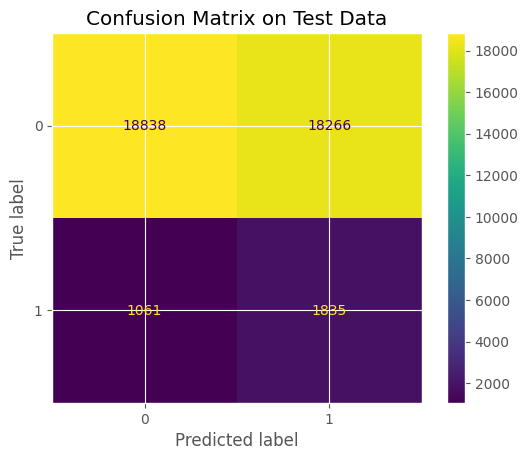

In [152]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y, y_pred_all)

# Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix on Test Data')

# Convert the predictions to a DataFrame
y_pred_df = pd.DataFrame(y_pred_all, columns=['y_pred'])

# Combine original features and labels with new predictions
new_data = pd.concat([df_encoded, y_pred_df], axis=1)
print(len(new_data))

total_duration = new_data.loc[(new_data['y_pred'] == 1) & (new_data['y'] == 1), 'duration'].sum()
print('total call duration after with correct positives:',total_duration)
print('number of correct calls resulting in positive:', len(new_data.loc[(new_data['y_pred'] == 1) & (new_data['y'] == 1), 'duration']))

### 8. CONCLUSION ###

### The LightGBM model reduces call duration from 2831.4 hrs to 332.3 hrs. by 88%. But in the process the company looses 1061 customers, 37%. ###